<a href="https://colab.research.google.com/github/itsfareed/The_Queens_Speech/blob/main/The_Queens_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# The Queens Speech, Is She Really Saying Anything?

##Abstract

"The Queen's Christmas Broadcast," is an annual started by King George V in 1932 and continued by Queen Elizabeth II throughout her reign. Although the landscape of the British Empire has shifted and there have been several challenges to the monarchy’s prestige, the annual message is firmly a bedrock to stability and connection for the United Kingdom and the Commonwealth.

Through data analysis with tools in the Python environment, the study investigates the message and language usage with the Broadcast to test if it adapts to global events or if the message remains the same. The research and methodology use tools developed in class to analyze the Queen’s broadcasts. The challenges of this research were the limits on the available tools and access permissions on the source data. Web scraping, data cleaning, and text analysis were incorporated into analyzing the data.

The research asserts that Queen Elizabeth strove for positivity and used consistently positive language even during periods of hardship. The absence of elevated vocabulary suggests an effort on behalf of the Queen to connect with her public, framing the British Empire as a community rather than subjects under a sovereign.

###Introduction

For the last 50 years, Her Late Majesty Queen Elizabeth II religiously delivered a speech to her global subjects entitled “The Queens Christmas Broadcast” (Broadcast). This annual tradition was started by the Queen’s grandfather, King George the Fifth, in 1932 and has continued since then, with the most recent speech delivered in 2022 by King Charles. The Queen's message is broadcast globally via radio, television, and the internet.

The role of the Queen is arguably one requiring the staunchest maintenance of “keeping up appearances”. The classic idea of monarchy is stability. However, over the last 60 years, the size and shape of the British Empire has shifted, and several conflicts have reduced the standing and prestige of the Crown.

As new forms of media create access to the inner workings and intimate interactions of members of the monarchy, it is interesting to see the veneer of stoic leadership tarnish. Yet, even as scandal, tabloid drama, public death, cheating, and other human attributes touch the monarchy, the Queens Christmas Broadcast has always anchored the United Kingdom and the British Commonwealth towards the Sovereign.

###Problem Statement

The length of the Broadcast is typically very short, read and delivered in under seven minutes. For broadcast, the setting is cozy, and the Queen is always alone, perhaps a picture can be seen in a frame is present in the foreground or background, but the subject of the video is firmly the Queen herself. Does the word usage and choice of the Broadcast change significantly over time depending on what is going on globally, or has the message been an annual rehashing to the equivalent of a “get well soon” card?

###Research Question

What is the overall feel of the Broadcast, and has the terminology and word usage changed significantly over time and during various periods of the Monarchy?

###Hypothesis

The Queen maintains subtle verbal tools to convey overall messages of strength in the Monarchy and a steadfast focus on community. The tone of the Broadcast has changed significantly throughout her monarchy.

###Sources

I have exclusively used the transcripts of the Queens Christmas Broadcast found on the website of the British Monarchy: https://www.royal.uk/the-christmas-broadcast.

###Methodology

Using tools learned throughout the semester, I went through the process using the tools of web scraping the website to collect the transcripts of the Broadcast. However, after several attempts and a return of the 403 error, I understood that the website turned off the ability to do such scraping.

I consulted ChatGPT and BardAI for help in preparing code to get around the 403 error but was unsuccessful in that attempt, so I manually saved the broadcast data as .html files and created a folder on my Google Drive.

I used the sklearn process, pandas, and pathlib method discussed in class to convert the files into the correct format, and then I used BeautifulSoup to rewrite the files into .txt and saved them to another file within my Google Drive.

I ran the tfidf function to look at several terms that I thought would be in the Broadcast and continued with this process of trial and error until I came up with several words that would give me the desired output.

Using a word cloud, I discovered that my data needed further cleaning I used the stopword method to clean the data, and I used ChatGPT to integrate a list of custom stopwords as well, however, I do not think the function worked as well as I would have liked, as subsequent frequently used words appeared in the word cloud after running the custom stopword list.

I used several functions to standardize the data using lowercase letters and save that data to a new file on my Google Drive. I repeated the steps for the wordcloud and got a slightly different word set, but it was generally identical to the output I previously received.

Switching to word frequency tables, I was able to see where the value was placed during the Broadcast, with the outcome of several words surprising me like the frequency of Kenya, and several words not surprising, like the focus on love and admiration. The chard showing the frequency of several words is the most useful, and although I tried to use the heatmap function and failed, I thought that tool would have been generally useful in my analysis.

###Conclusion

The Queen’s Christmas Broadcast has maintained a generally warm tone during the years it was delivered by Queen Elizabeth. The word usage has remained acceptable to a generally educated audience, but there are not many unique or difficult words. There is a generally positive tone in the Broadcast as shown by the sentiment analysis, and there is no focus on either war or calling listeners “subjects”, it appears that the Queen instead focused on the idea that members of the British Empire were mere community members, rather than participants in a monarchy with an absolute sovereign.



In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

I used help from ChatGPT to create a text file with the content, as I was having issues on where to start.


In [ ]:
def create_text_file(filename, content):
    with open(filename, 'w', encoding='utf-8') as file:
        file.write(content)

I tried to add url of content to scrape.


In [ ]:
url = 'https://www.royal.uk/the-christmas-broadcast'

In [ ]:
response = requests.get(url)

In [ ]:
import os
import requests
from bs4 import BeautifulSoup

# Function to create a text file with the given content
def create_text_file(filename, content):
    with open(filename, 'w', encoding='utf-8') as file:
        file.write(content)

# URL of the website to scrape
url = 'https://www.royal.uk/the-christmas-broadcast'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all links on the page
    links = soup.find_all('a', href=True)

    # Create a directory to store text files
    output_directory = 'output_files'
    os.makedirs(output_directory, exist_ok=True)

    # Loop through each link
    for link in links:
        # Get the URL of the link
        link_url = link['href']

        # Check if the link leads to a valid webpage (starting with 'https://www.royal.uk/')
        if link_url.startswith('https://www.royal.uk/'):
            # Send a GET request to the link URL
            link_response = requests.get(link_url)

            # Check if the request was successful (status code 200)
            if link_response.status_code == 200:
                # Parse the HTML content of the linked page
                linked_soup = BeautifulSoup(link_response.text, 'html.parser')

                # Get the text content of the page
                page_content = linked_soup.get_text()

                # Create a text file for each link in the output directory
                filename = os.path.join(output_directory, f'{link_url.split("/")[-1]}.txt')
                create_text_file(filename, page_content)

                print(f'Text file created for {link_url}.')

            else:
                print(f'Failed to fetch content from {link_url}. Status code: {link_response.status_code}')

else:
    print(f'Failed to fetch content from {url}. Status code: {response.status_code}')


Failed to fetch content from https://www.royal.uk/the-christmas-broadcast. Status code: 403


In [ ]:
import os
import requests
from bs4 import BeautifulSoup

# Function to create a text file with the given content
def create_text_file(filename, content):
    with open(filename, 'w', encoding='utf-8') as file:
        file.write(content)

# URL of the website to scrape
url = 'https://www.royal.uk/the-christmas-broadcast'

# Set User-Agent header
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Use a session to handle cookies
with requests.Session() as session:
    # Send a GET request to the URL
    response = session.get(url, headers=headers)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find all links on the page
        links = soup.find_all('a', href=True)

        # Create a directory to store text files
        output_directory = 'output_files'
        os.makedirs(output_directory, exist_ok=True)

        # Loop through each link
        for link in links:
            # Get the URL of the link
            link_url = link['href']

            # Check if the link leads to a valid webpage (starting with 'https://www.royal.uk/')
            if link_url.startswith('https://www.royal.uk/'):
                # Send a GET request to the link URL
                link_response = session.get(link_url)

                # Check if the request was successful (status code 200)
                if link_response.status_code == 200:
                    # Parse the HTML content of the linked page
                    linked_soup = BeautifulSoup(link_response.text, 'html.parser')

                    # Get the text content of the page
                    page_content = linked_soup.get_text()

                    # Create a text file for each link in the output directory
                    filename = os.path.join(output_directory, f'{link_url.split("/")[-1]}.txt')
                    create_text_file(filename, page_content)

                    print(f'Text file created for {link_url}.')

                else:
                    print(f'Failed to fetch content from {link_url}. Status code: {link_response.status_code}')

    else:
        print(f'Failed to fetch content from {url}. Status code: {response.status_code}')


Failed to fetch content from https://www.royal.uk/the-christmas-broadcast. Status code: 403


In [ ]:
import os
import requests
from bs4 import BeautifulSoup

# Function to create a text file with the given content
def create_text_file(filename, content):
    with open(filename, 'w', encoding='utf-8') as file:
        file.write(content)

# URL of the website with the transcript
url = 'https://www.royal.uk/kings-christmas-broadcast-2022'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the element containing the transcript (you may need to inspect the page source to find the correct tag and class)
    transcript_element = soup.find('div', class_='your-transcript-class')  # Replace 'your-transcript-class' with the actual class

    if transcript_element:
        # Get the text content of the transcript element
        transcript_content = transcript_element.get_text()

        # Create a text file and save the transcript as "KingsSpeech.txt"
        filename = 'KingsSpeech.txt'
        create_text_file(filename, transcript_content)

        print(f'Transcript saved to {filename}.')
    else:
        print('Transcript element not found. Please check the HTML structure of the page.')

else:
    print(f'Failed to fetch content from {url}. Status code: {response.status_code}')


Failed to fetch content from https://www.royal.uk/kings-christmas-broadcast-2022. Status code: 403


This wasnt working, so I used the HTML files that I saved previously, hoping that this would work.


Going to use the same process for the SOTU from class.

In [ ]:
response = requests.get("https://www.royal.uk/queens-first-christmas-broadcast-1952")

In [ ]:
response

<Response [403]>

In [ ]:
html_string = response.text
print(html_string)

<!DOCTYPE html><html lang="en-US"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><link href="/cdn-cgi/styles/challenges.css" rel="stylesheet"><meta http-equiv="refresh" content="375"></head><body class="no-js"><div class="main-wrapper" role="main"><div class="main-content"><noscript><div id="challenge-error-title"><div class="h2"><span class="icon-wrapper"><div class="heading-icon warning-icon"></div></span><span id="challenge-error-text">Enable JavaScript and cookies to continue</span></div></div></noscript></div></div><script>(function(){window._cf_chl_opt={cvId: '2',cZone: "www.royal.uk",cType: 'managed',cNounce: '53330',cRay: '83824aae79d1630f',cHash: '3b446433e06e5cf',cUPMDTk: "\/queens-first-christmas-broadcast-1952?__cf_chl_tk=vgR40mj7P9KC_yfiWKPURn5ifRUQrB6f

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='https://drive.google.com/drive/folders/197BHhI8r-ui2x4sT4iqfuM8kGchjkNZQ?usp=share_link'

In [ ]:
id = 0
for text in df_articles['scraped_text']:
    soup = BeautifulSoup(text)
    article = soup.get_text()

    id += 1
    with open(f"{path}/{id}.txt", "w") as file:
        file.write(str(article))

NameError: ignored

In [ ]:
import os
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseUpload
import io

# Google Drive API scopes
SCOPES = ['https://www.googleapis.com/auth/drive']

# Specify the source folder ID
source_folder_id = '197BHhI8r-ui2x4sT4iqfuM8kGchjkNZQ'

# Specify the destination folder ID
destination_folder_id = '1TbtSc-obMRtqY3tDmyE149tZM49l8j5h'

def authenticate_google_drive_api():
    credentials = None

    # The file token.json stores the user's access and refresh tokens
    token_file = 'token.json'

    if os.path.exists(token_file):
        credentials = Credentials.from_authorized_user_file(token_file)

    if not credentials or not credentials.valid:
        if credentials and credentials.expired and credentials.refresh_token:
            credentials.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            credentials = flow.run_local_server(port=0)

        with open(token_file, 'w') as token:
            token.write(credentials.to_json())

    return credentials

def download_html_files(service, folder_id):
    results = service.files().list(q=f"'{folder_id}' in parents", fields="files(id, name)").execute()
    files = results.get('files', [])

    for file in files:
        file_id = file['id']
        file_name = file['name']

        request = service.files().export_media(fileId=file_id, mimeType='text/html')
        response = request.execute()

        # Save the HTML content to a .html file
        with open(f'{file_name}.html', 'wb') as html_file:
            html_file.write(response)

        # Upload the HTML file to the destination folder
        upload_html_file(service, f'{file_name}.html')

def upload_html_file(service, file_path):
    media = MediaIoBaseUpload(io.FileIO(file_path, 'rb'), mimetype='text/html')
    file_name = os.path.basename(file_path)

    file_metadata = {
        'name': file_name,
        'parents': [destination_folder_id]
    }

    request = service.files().create(body=file_metadata, media_body=media, fields='id')
    request.execute()

def main():
    # Authenticate the Google Drive API
    credentials = authenticate_google_drive_api()

    # Build the Google Drive API service
    service = build('drive', 'v3', credentials=credentials)

    # Download HTML files and save them as .html files
    download_html_files(service, source_folder_id)

if __name__ == '__main__':
    main()


FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
directory_path = "/content/drive/MyDrive/Colab Notebooks/Final Project/Queens Speech HTML"

In [ ]:
!pip install sklearn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
pd.options.display.max_rows = 600
from pathlib import Path
import glob

In [ ]:
text_files = glob.glob(f"{directory_path}/*.html")

In [ ]:
text_files

['/content/drive/MyDrive/Colab Notebooks/Final Project/Queens Speech HTML/christmas-broadcast-1954.html',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens Speech HTML/christmas-broadcast-1955.html',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens Speech HTML/christmas-broadcast-1956.html',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens Speech HTML/christmas-broadcast-1957.html',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens Speech HTML/christmas-broadcast-1958.html',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens Speech HTML/christmas-broadcast-1959.html',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens Speech HTML/christmas-broadcast-1960.html',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens Speech HTML/christmas-broadcast-1961.html',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens Speech HTML/christmas-broadcast-1962.html',
 '/content/drive/MyDrive/Colab Notebooks/Final

In [ ]:
from bs4 import BeautifulSoup
import os

# Define the input and output directories
input_dir = '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens Speech HTML'
output_dir = '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Speech_TXT'

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Iterate through HTML files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.html'):
        input_path = os.path.join(input_dir, filename)
        output_filename = os.path.splitext(filename)[0] + '.txt'
        output_path = os.path.join(output_dir, output_filename)

        # Open HTML file and parse with BeautifulSoup
        with open(input_path, 'r', encoding='utf-8') as html_file:
            html_content = html_file.read()
            soup = BeautifulSoup(html_content, 'html.parser')

            # Extract text content
            text_content = soup.get_text(separator='\n', strip=True)

            # Save text content to a new text file
            with open(output_path, 'w', encoding='utf-8') as txt_file:
                txt_file.write(text_content)

        print(f"Conversion complete: {filename} -> {output_filename}")


Conversion complete: christmas-broadcast-1954.html -> christmas-broadcast-1954.txt
Conversion complete: christmas-broadcast-1955.html -> christmas-broadcast-1955.txt
Conversion complete: christmas-broadcast-1956.html -> christmas-broadcast-1956.txt
Conversion complete: christmas-broadcast-1957.html -> christmas-broadcast-1957.txt
Conversion complete: christmas-broadcast-1958.html -> christmas-broadcast-1958.txt
Conversion complete: christmas-broadcast-1959.html -> christmas-broadcast-1959.txt
Conversion complete: christmas-broadcast-1960.html -> christmas-broadcast-1960.txt
Conversion complete: christmas-broadcast-1961.html -> christmas-broadcast-1961.txt
Conversion complete: christmas-broadcast-1962.html -> christmas-broadcast-1962.txt
Conversion complete: christmas-broadcast-1963.html -> christmas-broadcast-1963.txt
Conversion complete: christmas-broadcast-1964.html -> christmas-broadcast-1964.txt
Conversion complete: christmas-broadcast-1965.html -> christmas-broadcast-1965.txt
Conv

In [ ]:
directory_path = "/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Speech_TXT"

In [ ]:
text_files = glob.glob(f"{directory_path}/*.txt")

In [ ]:
text_files


['/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Speech_TXT/christmas-broadcast-1954.txt',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Speech_TXT/christmas-broadcast-1955.txt',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Speech_TXT/christmas-broadcast-1956.txt',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Speech_TXT/christmas-broadcast-1957.txt',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Speech_TXT/christmas-broadcast-1958.txt',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Speech_TXT/christmas-broadcast-1959.txt',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Speech_TXT/christmas-broadcast-1960.txt',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Speech_TXT/christmas-broadcast-1961.txt',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Speech_TXT/christmas-broadcast-1962.txt',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Sp

In [ ]:
text_titles = [Path(text).stem for text in text_files]

In [ ]:
text_titles

['christmas-broadcast-1954',
 'christmas-broadcast-1955',
 'christmas-broadcast-1956',
 'christmas-broadcast-1957',
 'christmas-broadcast-1958',
 'christmas-broadcast-1959',
 'christmas-broadcast-1960',
 'christmas-broadcast-1961',
 'christmas-broadcast-1962',
 'christmas-broadcast-1963',
 'christmas-broadcast-1964',
 'christmas-broadcast-1965',
 'christmas-broadcast-1966',
 'christmas-broadcast-1967',
 'christmas-broadcast-1968',
 'christmas-broadcast-1969',
 'christmas-broadcast-1970',
 'christmas-broadcast-1971',
 'christmas-broadcast-1972',
 'christmas-broadcast-1973',
 'christmas-broadcast-1974',
 'christmas-broadcast-1975',
 'christmas-broadcast-1976',
 'christmas-broadcast-1977',
 'christmas-broadcast-1978',
 'christmas-broadcast-1979',
 'christmas-broadcast-1980',
 'christmas-broadcast-1981',
 'christmas-broadcast-1982',
 'christmas-broadcast-1983',
 'christmas-broadcast-1984',
 'christmas-broadcast-1985',
 'christmas-broadcast-1986',
 'christmas-broadcast-1987',
 'christmas-br

In [ ]:
tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words='english')

In [ ]:
tfidf_vector = tfidf_vectorizer.fit_transform(text_files)

In [ ]:
type(tfidf_vector)

scipy.sparse._csr.csr_matrix

In [ ]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
tfidf_df.loc['00_Document Frequency'] = (tfidf_df > 0).sum()

In [ ]:
tfidf_slice = tfidf_df[['christmas', 'holiday', 'peace','war','commonwealth','empire','princess','diana','subject','citizen']]
tfidf_slice.sort_index().round(decimals=2)

KeyError: ignored

In [ ]:
tfidf_slice = tfidf_df[['christmas', 'holiday', 'peace','war','commonwealth','empire','princess','diana','citizen']]
tfidf_slice.sort_index().round(decimals=2)

,christmas,holiday,peace,war,commonwealth,empire,princess,diana,citizen
00_Document Frequency,68.00,1.00,48.00,26.00,65.00,3.00,19.00,3.00,1.00
christmas-broadcast-1954,0.13,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00
christmas-broadcast-1955,0.29,0.00,0.02,0.00,0.07,0.03,0.02,0.00,0.00
christmas-broadcast-1956,0.30,0.00,0.01,0.02,0.07,0.00,0.02,0.00,0.00
christmas-broadcast-1957,0.31,0.00,0.03,0.00,0.04,0.00,0.02,0.00,0.00
christmas-broadcast-1958,0.30,0.00,0.01,0.00,0.05,0.00,0.08,0.00,0.00
christmas-broadcast-1959,0.21,0.00,0.08,0.00,0.03,0.00,0.00,0.00,0.00
christmas-broadcast-1960,0.20,0.00,0.04,0.00,0.08,0.00,0.02,0.00,0.00
christmas-broadcast-1961,0.21,0.00,0.02,0.00,0.03,0.00,0.00,0.00,0.00
christmas-broadcast-1962,0.08,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00


In [ ]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
tfidf_df.loc['00_Document Frequency'] = (tfidf_df > 0).sum()

In [ ]:
import nltk
from collections import Counter
cnt = Counter()
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
def border_count(text): #a function I made to count the appearances of "border" in each transcript. Adapted from the web scraping function.
    text_tokens = nltk.word_tokenize(text)
    nltk_text = nltk.Text(text_tokens)
    count = nltk_text.count('border')
    return count

In [ ]:
pip install wordcloud matplotlib

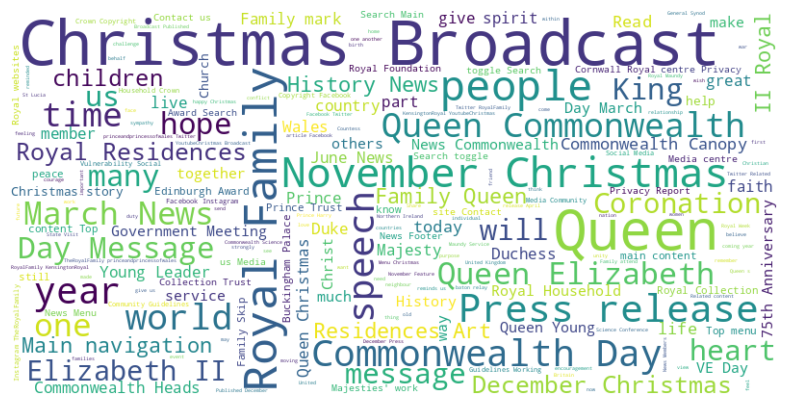

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

# Define the directory containing the text files
text_files_dir = '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Speech_TXT'

# Initialize an empty string to store the combined text content
combined_text = ""

# Iterate through text files in the directory
for filename in os.listdir(text_files_dir):
    if filename.endswith('.txt'):
        file_path = os.path.join(text_files_dir, filename)

        # Open and read the text file
        with open(file_path, 'r', encoding='utf-8') as txt_file:
            text_content = txt_file.read()

            # Append the text content to the combined_text string
            combined_text += text_content

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
pip install collections

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [ ]:
import os
from collections import Counter

# Define the directory containing the text files
text_files_dir = '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Speech_TXT'

# Initialize an empty list to store all words
all_words = []

# Iterate through text files in the directory
for filename in os.listdir(text_files_dir):
    if filename.endswith('.txt'):
        file_path = os.path.join(text_files_dir, filename)

        # Open and read the text file
        with open(file_path, 'r', encoding='utf-8') as txt_file:
            text_content = txt_file.read()

            # Tokenize the text into words (split by whitespace)
            words = text_content.split()

            # Extend the list of all words with the words from the current file
            all_words.extend(words)

# Use Counter to count word occurrences
word_counter = Counter(all_words)

# Get the 20 most common words
most_common_words = word_counter.most_common(20)

# Print the results
print("Top 20 most used words:")
for word, count in most_common_words:
    print(f"{word}: {count}")


Top 20 most used words:
the: 4904
of: 4429
and: 3490
The: 3015
to: 2553
in: 1535
a: 1519
Christmas: 1304
is: 1044
Royal: 1031
that: 983
for: 967
Commonwealth: 946
News: 904
Queen: 871
I: 845
Broadcast: 831
2015: 722
have: 689
this: 677


Remove stopwords


In [ ]:
from nltk.corpus import stopwords
STOPWORDS = stopwords.words('english')

text = ' '.join([word for word in text.split() if word not in STOPWORDS])

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
STOPWORDS = stopwords.words('english')


This additional code snippet further cleans the text by removing non-alphabetic characters, reducing consecutive whitespace to a single space, and eliminating single-character words.

In [ ]:
import re
text = re.sub('[^a-zA-Z]', ' ', text )
text = re.sub(r'\s+', ' ', text)
text = re.sub(r'(?:^| )\w(?:$| )', ' ', text).strip()

In [ ]:
soup = BeautifulSoup(html_string)
article = soup.get_text()
print(article)


Just a moment...Enable JavaScript and cookies to continue


In [ ]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
text = ' '.join(tokenizer.tokenize(text))

In [ ]:
import os
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus (only need to do this once)
nltk.download('stopwords')

# Define the directory containing the text files
text_files_dir = '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Speech_TXT'

# Initialize an empty list to store all words
all_words = []

# Get the set of English stopwords
stop_words = set(stopwords.words('english'))

# Iterate through text files in the directory
for filename in os.listdir(text_files_dir):
    if filename.endswith('.txt'):
        file_path = os.path.join(text_files_dir, filename)

        # Open and read the text file
        with open(file_path, 'r', encoding='utf-8') as txt_file:
            text_content = txt_file.read()

            # Tokenize the text into words (split by whitespace)
            words = text_content.split()

            # Remove stopwords
            filtered_words = [word for word in words if word.lower() not in stop_words]

            # Extend the list of all words with the filtered words from the current file
            all_words.extend(filtered_words)

# Use Counter to count word occurrences
word_counter = Counter(all_words)

# Get the 20 most common words
most_common_words = word_counter.most_common(20)

# Print the results
print("Top 20 most used words (excluding stopwords):")
for word, count in most_common_words:
    print(f"{word}: {count}")


Top 20 most used words (excluding stopwords):
Christmas: 1304
Royal: 1031
Commonwealth: 946
News: 904
Queen: 871
Broadcast: 831
2015: 722
November: 551
us: 536
Queen's: 504
December: 497
March: 441
25: 434
Day: 422
2016: 422
people: 419
Family: 364
message: 302
Read: 278
one: 277


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import os

# Define the input and output directories
input_dir = '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Speech_TXT'
output_dir = '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Speech_Cleaned'

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Iterate through text files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.txt'):
        input_path = os.path.join(input_dir, filename)
        output_filename = os.path.splitext(filename)[0] + '_cleaned.txt'
        output_path = os.path.join(output_dir, output_filename)

        # Open the input text file, read content, and convert to lowercase
        with open(input_path, 'r', encoding='utf-8') as input_file:
            text_content = input_file.read().lower()

            # Save the lowercase text content to a new text file
            with open(output_path, 'w', encoding='utf-8') as output_file:
                output_file.write(text_content)

        print(f"Conversion complete: {filename} -> {output_filename}")


Conversion complete: christmas-broadcast-1954.txt -> christmas-broadcast-1954_cleaned.txt
Conversion complete: christmas-broadcast-1955.txt -> christmas-broadcast-1955_cleaned.txt
Conversion complete: christmas-broadcast-1956.txt -> christmas-broadcast-1956_cleaned.txt
Conversion complete: christmas-broadcast-1957.txt -> christmas-broadcast-1957_cleaned.txt
Conversion complete: christmas-broadcast-1958.txt -> christmas-broadcast-1958_cleaned.txt
Conversion complete: christmas-broadcast-1959.txt -> christmas-broadcast-1959_cleaned.txt
Conversion complete: christmas-broadcast-1960.txt -> christmas-broadcast-1960_cleaned.txt
Conversion complete: christmas-broadcast-1961.txt -> christmas-broadcast-1961_cleaned.txt
Conversion complete: christmas-broadcast-1962.txt -> christmas-broadcast-1962_cleaned.txt
Conversion complete: christmas-broadcast-1963.txt -> christmas-broadcast-1963_cleaned.txt
Conversion complete: christmas-broadcast-1964.txt -> christmas-broadcast-1964_cleaned.txt
Conversion

In [ ]:
import os
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus (only need to do this once)
nltk.download('stopwords')

# Define the directory containing the text files
text_files_dir = '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Speech_Cleaned'

# Initialize an empty list to store all words
all_words = []

# Get the set of English stopwords
stop_words = set(stopwords.words('english'))

# Add your custom stopwords to the set
custom_stopwords = {'christmas', 'queens', 'queen','broadcast','news',"queen's"}
stop_words.update(custom_stopwords)

# Iterate through text files in the directory
for filename in os.listdir(text_files_dir):
    if filename.endswith('.txt'):
        file_path = os.path.join(text_files_dir, filename)

        # Open and read the text file
        with open(file_path, 'r', encoding='utf-8') as txt_file:
            text_content = txt_file.read()

            # Tokenize the text into words (split by whitespace)
            words = text_content.split()

            # Remove stopwords (both standard and custom)
            filtered_words = [word for word in words if word.lower() not in stop_words]

            # Extend the list of all words with the filtered words from the current file
            all_words.extend(filtered_words)

# Use Counter to count word occurrences
word_counter = Counter(all_words)

# Get the 20 most common words
most_common_words = word_counter.most_common(20)

# Print the results
print("Top 20 most used words (excluding stopwords):")
for word, count in most_common_words:
    print(f"{word}: {count}")


Top 20 most used words (excluding stopwords):
royal: 1031
commonwealth: 946
2015: 722
november: 551
us: 538
december: 497
family: 468
day: 462
march: 448
message: 447
25: 434
people: 429
2016: 422
one: 291
read: 284
press: 277
release: 276
may: 272
feature: 265
-: 255


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


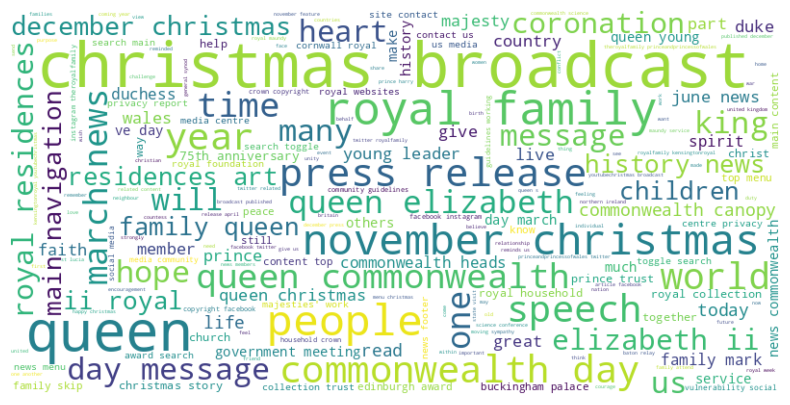

In [ ]:
combined_text = ""

# Iterate through text files in the directory
for filename in os.listdir(text_files_dir):
    if filename.endswith('.txt'):
        file_path = os.path.join(text_files_dir, filename)

        # Open and read the text file
        with open(file_path, 'r', encoding='utf-8') as txt_file:
            text_content = txt_file.read()

            # Append the text content to the combined_text string
            combined_text += text_content

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
custom_stopwords = {'search toggle','toggle','content', 'content top','christmas', 'queens', 'queen','broadcast','news',"queen's",'main navigation','press release','message','christmas broadcast','december'}
stop_words.update(custom_stopwords)

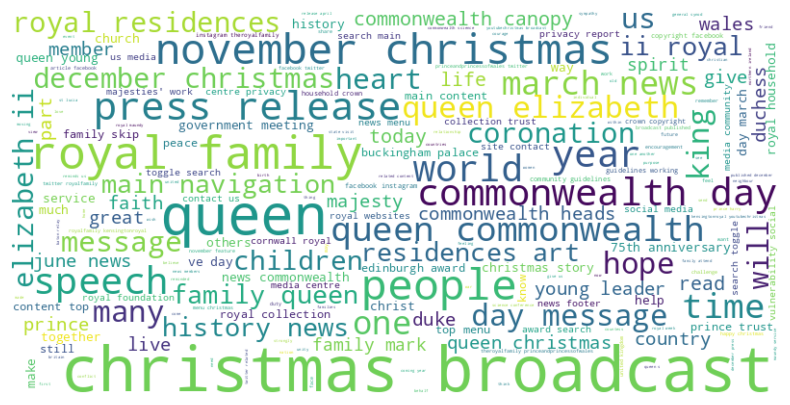

In [ ]:
combined_text = ""

# Iterate through text files in the directory
for filename in os.listdir(text_files_dir):
    if filename.endswith('.txt'):
        file_path = os.path.join(text_files_dir, filename)

        # Open and read the text file
        with open(file_path, 'r', encoding='utf-8') as txt_file:
            text_content = txt_file.read()

            # Append the text content to the combined_text string
            combined_text += text_content

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


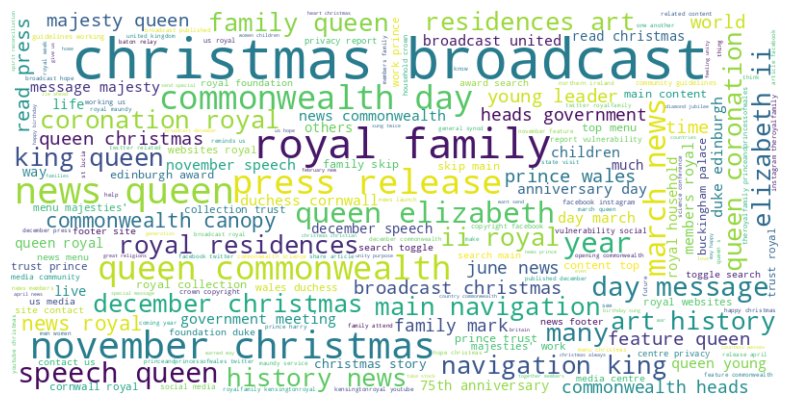

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus (only need to do this once)
nltk.download('stopwords')

# Define the directory containing the text files
text_files_dir = '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Speech_Cleaned'

# Initialize an empty string to store the combined text content
combined_text = "'search toggle','toggle','content', 'content top','christmas', 'queens', 'queen','broadcast','news','main navigation','press release','message','christmas broadcast','december'}"
stop_words.update(custom_stopwords)

# Get the set of English stopwords
stop_words = set(stopwords.words('english'))

# Add your custom stopwords to the set
custom_stopwords = {''}
stop_words.update(custom_stopwords)

# Iterate through text files in the directory
for filename in os.listdir(text_files_dir):
    if filename.endswith('.txt'):
        file_path = os.path.join(text_files_dir, filename)

        # Open and read the text file
        with open(file_path, 'r', encoding='utf-8') as txt_file:
            text_content = txt_file.read()

            # Exclude stopwords (both standard and custom)
            filtered_text = ' '.join(word for word in text_content.split() if word.lower() not in stop_words)

            # Append the filtered text content to the combined_text string
            combined_text += filtered_text + ' '

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn
import pandas as pd

def text_preprocessing(document_text):
        # convert all text to lowercase
        doc_text = document_text.lower()

        # remove numbers
        doc_text = re.sub(r'\d+', '', doc_text)

        # remove punctuation, characters and whitespaces
        doc_text = re.sub('\W+', ' ', doc_text)

        # remove stopwords and tokenize
        stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(doc_text)
        result = [i for i in tokens if not i in stop_words]

        result2 = []

        for word in result:
            if len(word) > 2:
                result2.append(word)

        return result2

def GenerateFrequencyList(match_pattern):
    frequency = {}

    for word in match_pattern:
        count = frequency.get(word, 0)
        frequency[word] = count + 1

    frequency_list = frequency.keys()
    return frequency_list,frequency

def FindWordFrequency(DataSourceText):
    Freqdf = pd.DataFrame()

    result = text_preprocessing(DataSourceText)
    frequency_list, frequency = GenerateFrequencyList(result)

    total_count = 0

    for words in frequency_list:
        total_count += frequency[words]

    for words in frequency_list:
        dfIndex = len(Freqdf)
        weighted_percentage = round((frequency[words]/total_count)*100,2)

        Freqdf.loc[dfIndex, 'word'] = words
        Freqdf.loc[dfIndex, 'length'] = len(words)
        Freqdf.loc[dfIndex, 'Frequency'] = frequency[words]
        Freqdf.loc[dfIndex, 'Weighted Percentage'] = weighted_percentage

    return Freqdf.sort_values(['Frequency'], ascending=False).reset_index()

In [ ]:
FindWordFrequency(text)

,index,word,length,Frequency,Weighted Percentage
0,32,news,4.0,33.0,3.50
1,347,september,9.0,24.0,2.55
2,0,king,4.0,20.0,2.12
3,13,wales,5.0,18.0,1.91
4,206,princess,8.0,15.0,1.59
5,26,queen,5.0,15.0,1.59
6,12,prince,6.0,13.0,1.38
7,320,october,7.0,12.0,1.27
8,321,visits,6.0,12.0,1.27
9,3,royal,5.0,11.0,1.17


In [ ]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import re
import os



def text_preprocessing(document_text):
    # convert all text to lowercase
    doc_text = document_text.lower()

    # remove numbers
    doc_text = re.sub(r'\d+', '', doc_text)

    # remove punctuation, characters, and whitespaces
    doc_text = re.sub('\W+', ' ', doc_text)

    # remove stopwords and tokenize
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(doc_text)
    result = [i for i in tokens if not i in stop_words]

    result2 = []

    for word in result:
        if len(word) > 2:
            result2.append(word)

    return result2

def GenerateFrequencyList(match_pattern):
    frequency = {}

    for word in match_pattern:
        count = frequency.get(word, 0)
        frequency[word] = count + 1

    frequency_list = frequency.keys()
    return frequency_list, frequency

def FindWordFrequency(DataSourceText):
    Freqdf = pd.DataFrame()

    result = text_preprocessing(DataSourceText)
    frequency_list, frequency = GenerateFrequencyList(result)

    total_count = 0

    for words in frequency_list:
        total_count += frequency[words]

    for words in frequency_list:
        dfIndex = len(Freqdf)
        weighted_percentage = round((frequency[words]/total_count)*100, 2)

        Freqdf.loc[dfIndex, 'word'] = words
        Freqdf.loc[dfIndex, 'length'] = len(words)
        Freqdf.loc[dfIndex, 'Frequency'] = frequency[words]
        Freqdf.loc[dfIndex, 'Weighted Percentage'] = weighted_percentage

    return Freqdf.sort_values(['Frequency'], ascending=False).reset_index()

# Define the directory containing the text files
files_dir = '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Speech_Cleaned'

# Initialize an empty string to store the combined text content
combined_text = ""

# Iterate through text files in the directory
for filename in os.listdir(files_dir):
    if filename.endswith('.txt'):
        file_path = os.path.join(files_dir, filename)

        # Open and read the text file
        with open(file_path, 'r', encoding='utf-8') as txt_file:
            text_content = txt_file.read()

            # Append the text content to the combined_text string
            combined_text += text_content + ' '

# Call the function with the combined text from all files
result_df = FindWordFrequency(combined_text)

# Print or further process the result_df as needed
print(result_df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


      index          word  length  Frequency  Weighted Percentage
0        26         queen     5.0     1542.0                 2.72
1         0     christmas     9.0     1375.0                 2.42
2        35  commonwealth    12.0     1094.0                 1.93
3         2         royal     5.0     1032.0                 1.82
4        32          news     4.0      944.0                 1.66
...     ...           ...     ...        ...                  ...
4755   2954   substantial    11.0        1.0                 0.00
4756   2951      affinity     8.0        1.0                 0.00
4757   2950      acquired     8.0        1.0                 0.00
4758   2949     seafaring     9.0        1.0                 0.00
4759   4759    overcoming    10.0        1.0                 0.00

[4760 rows x 5 columns]


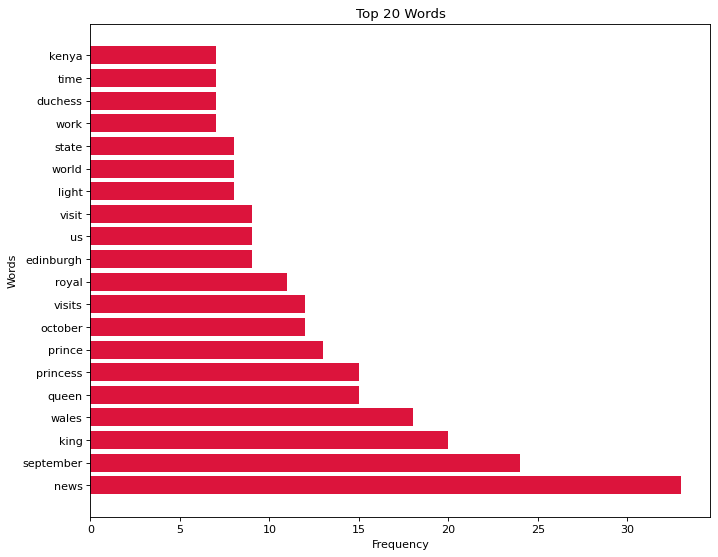

In [ ]:
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt

tf = Counter(text.split(' '))
y = [count for tag, count in tf.most_common(20)]
x = [tag.replace('_', ' ') for tag, count in tf.most_common(20)]

plt.figure(figsize=(10, 8), dpi=80)
plt.barh(x, y, color='crimson')
plt.title('Top 20 Words')
plt.ylabel('Words')
plt.xlabel('Frequency')
plt.show()

In [ ]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import re
import os

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


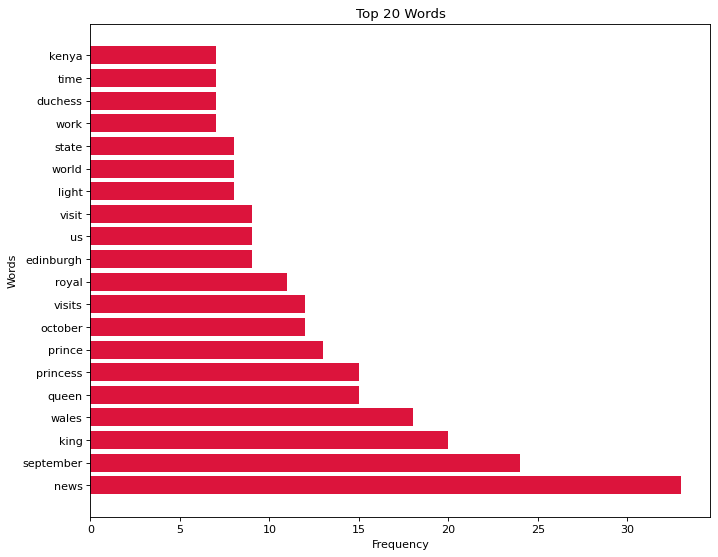

In [ ]:
tf = Counter(text.split(' '))
y = [count for tag, count in tf.most_common(20)]
x = [tag.replace('_', ' ') for tag, count in tf.most_common(20)]

plt.figure(figsize=(10, 8), dpi=80)
plt.barh(x, y, color='crimson')
plt.title('Top 20 Words')
plt.ylabel('Words')
plt.xlabel('Frequency')
plt.show()

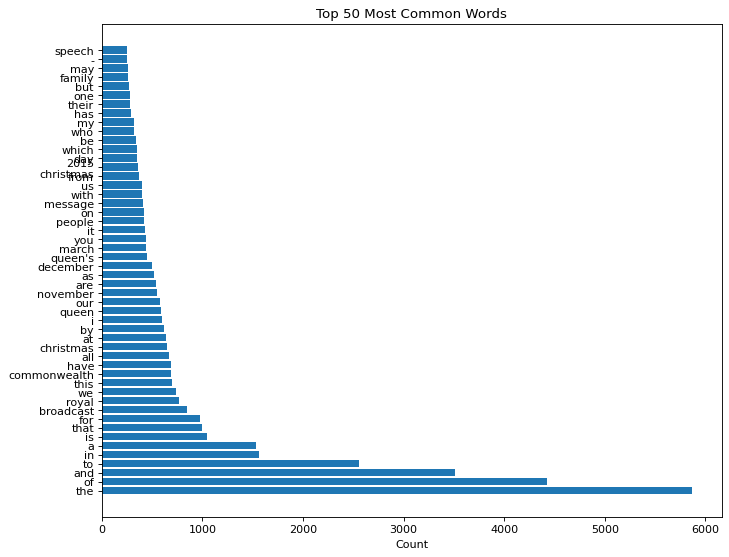

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Assuming combined_text is the variable storing the text content
tf = Counter(combined_text.split(' '))
y = [count for tag, count in tf.most_common(50)]
x = [tag.replace('_', ' ') for tag, count in tf.most_common(50)]

plt.figure(figsize=(10, 8), dpi=80)
plt.barh(x, y)
plt.xlabel('Count')
plt.title('Top 50 Most Common Words')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


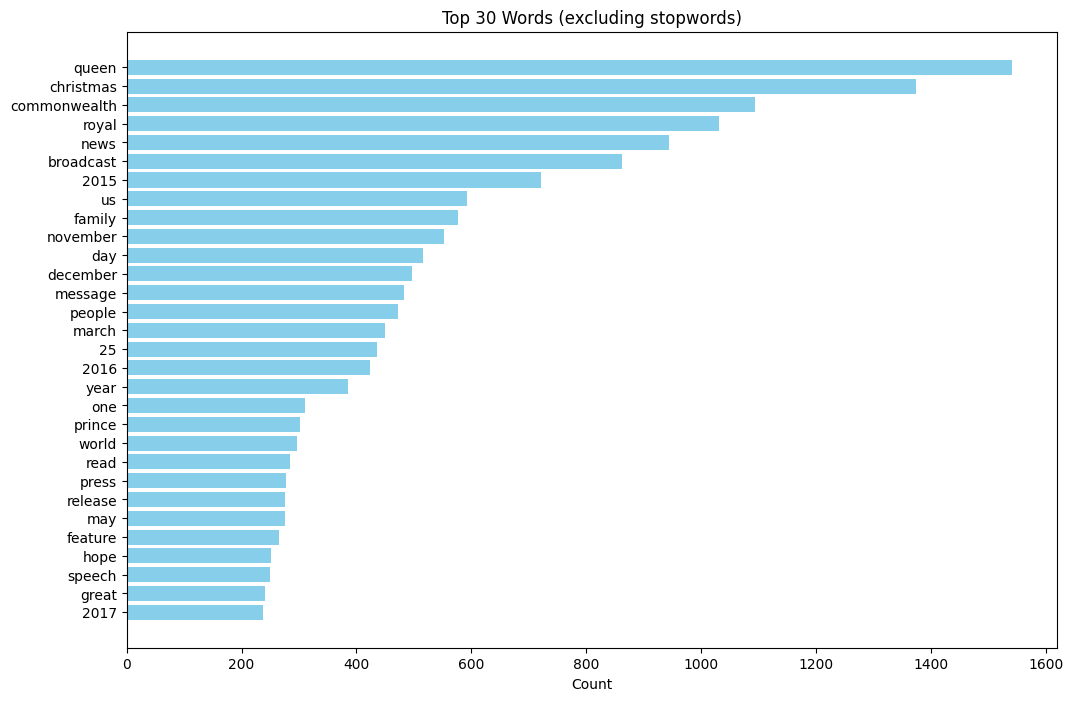

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus (only need to do this once)
nltk.download('stopwords')

# Assuming combined_text is the variable storing the text content
stop_words = set(stopwords.words('english'))

# Add your custom stopwords to the set
custom_stopwords = {""}
stop_words.update(custom_stopwords)

# Tokenize the text and remove stopwords
tokens = nltk.word_tokenize(combined_text.lower())
filtered_tokens = [word for word in tokens if word.isalnum() and word.lower() not in stop_words]

# Count the occurrences of each word
word_counter = Counter(filtered_tokens)

# Get the top 30 words
top_words = word_counter.most_common(30)

# Extract words and counts for plotting
x = [word for word, count in top_words]
y = [count for word, count in top_words]

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.barh(x, y, color='skyblue')
plt.xlabel('Count')
plt.title('Top 30 Words (excluding stopwords)')
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()


In [ ]:
import altair as alt
import numpy as np

# Terms in this list will get a red dot in the visualization
term_list = ['people', 'peace', 'america', 'commonwealth', 'empire', 'subject']

# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + circle + text).properties(width = 600)

KeyError: ignored

In [ ]:
import altair as alt
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {
    'document': ['doc1', 'doc2', 'doc3', 'doc4', 'doc5'],
    'term': ['people', 'peace', 'america', 'commonwealth', 'empire'],
    'tfidf': [0.2, 0.15, 0.18, 0.23, 0.2]  # Replace with your actual tfidf values
}

top_tfidf = pd.DataFrame(data)

# Terms in this list will get a red dot in the visualization
term_list = ['people', 'peace', 'america', 'commonwealth', 'empire', 'subject']

# Adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0]) * 0.0001

# Base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x='rank:O',
    y='document:N'
).transform_window(
    rank="rank()",
    sort=[alt.SortField("tfidf", order="descending")],
    groupby=["document"],
)

# Heatmap specification
heatmap = base.mark_rect().encode(
    color='tfidf:Q'
)

# Red circle over terms in the above list
circle = base.mark_circle(size=100).encode(
    color=alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')
    )
)

# Text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text='term:N',
    color=alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# Display the three superimposed visualizations
(heatmap + circle + text).properties(width=600)


In [ ]:
import altair as alt
import pandas as pd
import numpy as np
import os

# Directory containing the cleaned text files
files_dir = '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Speech_Cleaned'

# Initialize an empty list to store data from text files
data_list = []

# Iterate through text files in the directory
for filename in os.listdir(files_dir):
    if filename.endswith('.txt'):
        file_path = os.path.join(files_dir, filename)

        # Open and read the text file
        with open(file_path, 'r', encoding='utf-8') as txt_file:
            text_content = txt_file.read()

            # Append data to the list
            data_list.append({
                'document': filename,  # Use filename as the document identifier
                'text': text_content
            })

# Create a DataFrame from the list
top_tfidf = pd.DataFrame(data_list)

# Assuming you have a function to calculate TF-IDF values, replace this line with your actual implementation
# Calculate TF-IDF values and add them to the DataFrame
top_tfidf['tfidf'] = np.random.rand(top_tfidf.shape[0])

# Terms in this list will get a red dot in the visualization
term_list = ['people', 'peace', 'america', 'commonwealth', 'empire', 'subject']

# Adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0]) * 0.0001

# Base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x='rank:O',
    y='document:N'
).transform_window(
    rank="rank()",
    sort=[alt.SortField("tfidf", order="descending")],
    groupby=["document"],
)

# Heatmap specification
heatmap = base.mark_rect().encode(
    color='tfidf:Q'
)

# Red circle over terms in the above list
circle = base.mark_circle(size=100).encode(
    color=alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')
    )
)

# Text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text='term:N',
    color=alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# Display the three superimposed visualizations
(heatmap + circle + text).properties(width=600)


alt.LayerChart(...)

In [ ]:
import altair as alt
import numpy as np

# Terms in this list will get a red dot in the visualization
term_list = ['community', 'together', 'world','tradition','kenya', 'love', 'emergency']

# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + circle + text).properties(width = 600)

alt.LayerChart(...)

This did not work for me.

In [ ]:
import altair as alt
import pandas as pd
import numpy as np
import os
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Download the stopwords corpus (only need to do this once)
nltk.download('stopwords')

# Directory containing the cleaned text files
files_dir = '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Speech_Cleaned'

# Initialize an empty list to store data from text files
data_list = []

# Iterate through text files in the directory
for filename in os.listdir(files_dir):
    if filename.endswith('.txt'):
        file_path = os.path.join(files_dir, filename)

        # Open and read the text file
        with open(file_path, 'r', encoding='utf-8') as txt_file:
            text_content = txt_file.read()

            # Append data to the list
            data_list.append({
                'document': filename,  # Use filename as the document identifier
                'text': text_content
            })

# Create a DataFrame from the list
top_tfidf = pd.DataFrame(data_list)

# Tokenize, preprocess, and count term occurrences
all_words = []
stop_words = set(stopwords.words('english'))

for index, row in top_tfidf.iterrows():
    text = row['text'].lower()
    tokens = nltk.word_tokenize(text)
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]
    all_words.extend(filtered_words)

# Use Counter to count term occurrences
term_counter = Counter(all_words)

# Get the top 40 terms
top_terms = term_counter.most_common(40)

# Create a DataFrame for the top terms
top_terms_df = pd.DataFrame(top_terms, columns=['term', 'count'])

# Create a heatmap using Altair
heatmap = alt.Chart(top_terms_df).mark_rect().encode(
    x='term:N',
    y='document:N',
    color='count:Q'
).properties(width=600)

heatmap


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


alt.Chart(...)

In [ ]:
import altair as alt
import pandas as pd
import numpy as np
import os
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Download the stopwords corpus (only need to do this once)
nltk.download('stopwords')

# Directory containing the cleaned text files
files_dir = '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Speech_Cleaned'

# Initialize an empty list to store data from text files
data_list = []

# Iterate through text files in the directory
for filename in os.listdir(files_dir):
    if filename.endswith('.txt'):
        file_path = os.path.join(files_dir, filename)

        # Open and read the text file
        with open(file_path, 'r', encoding='utf-8') as txt_file:
            text_content = txt_file.read()

            # Append data to the list
            data_list.append({
                'document': filename,  # Use filename as the document identifier
                'text': text_content
            })

# Create a DataFrame from the list
top_tfidf = pd.DataFrame(data_list)

# Tokenize, preprocess, and count term occurrences
all_words = []
stop_words = set(stopwords.words('english'))

for index, row in top_tfidf.iterrows():
    text = row['text'].lower()
    tokens = nltk.word_tokenize(text)
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]
    all_words.extend(filtered_words)

# Use Counter to count term occurrences
term_counter = Counter(all_words)

# Get the top 40 terms
top_terms = term_counter.most_common(40)

# Create a DataFrame for the top terms
top_terms_df = pd.DataFrame(top_terms, columns=['term', 'count'])

# Create a heatmap using Altair
heatmap = alt.Chart(top_terms_df).mark_rect().encode(
    x='term:N',
    y='document:N',
    color='count:Q'
).properties(width=600)

heatmap


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


alt.Chart(...)

Do the sentiment analysis

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import os
import pandas as pd

# Download the VADER lexicon (only need to do this once)
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Directory containing the cleaned text files
files_dir = '/content/drive/MyDrive/Colab Notebooks/Final Project/Queens_Speech_Cleaned'

# Initialize an empty list to store sentiment data
sentiment_data = []

# Iterate through text files in the directory
for filename in os.listdir(files_dir):
    if filename.endswith('.txt'):
        file_path = os.path.join(files_dir, filename)

        # Open and read the text file
        with open(file_path, 'r', encoding='utf-8') as txt_file:
            text_content = txt_file.read()

            # Perform sentiment analysis using VADER
            sentiment_score = sia.polarity_scores(text_content)['compound']

            # Append sentiment data to the list
            sentiment_data.append({
                'document': filename,
                'sentiment_score': sentiment_score
            })

# Create a DataFrame from the sentiment data
sentiment_df = pd.DataFrame(sentiment_data)

# Display the sentiment DataFrame
print(sentiment_df)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                        document  sentiment_score
0           christmas-broadcast-1954_cleaned.txt           0.9982
1           christmas-broadcast-1955_cleaned.txt           0.9998
2           christmas-broadcast-1956_cleaned.txt           0.9997
3           christmas-broadcast-1957_cleaned.txt           0.9998
4           christmas-broadcast-1958_cleaned.txt           0.9998
5           christmas-broadcast-1959_cleaned.txt           0.9969
6           christmas-broadcast-1960_cleaned.txt           0.9996
7           christmas-broadcast-1961_cleaned.txt           0.9997
8           christmas-broadcast-1962_cleaned.txt           0.9981
9           christmas-broadcast-1963_cleaned.txt           0.9998
10          christmas-broadcast-1964_cleaned.txt           0.9991
11          christmas-broadcast-1965_cleaned.txt           0.9998
12          christmas-broadcast-1966_cleaned.txt           0.9999
13          christmas-broadcast-1967_cleaned.txt           0.9999
14        